# Image Classification

In [110]:
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, MaxPooling2D, Flatten, Dense,Convolution2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import  optimizers


In [111]:
#STEP 1----------------->>>>>>>>>>>>>LOAD DATA
img_height = 150
img_width = 150

train_data = 'dataset/train/'
validation_data = 'dataset/train/'

In [112]:
#Now we have to rescale the pixel from [0, 255] to [0, 1] interval
#TRAIN_DATA
datagen = ImageDataGenerator(rescale=1/255)

#retreive the images
train_generator = datagen.flow_from_directory(train_data,target_size=(img_width,img_height) ,batch_size= 20,class_mode='binary')
#Validation_DATA

validation_generator = datagen.flow_from_directory(validation_data,target_size=(img_height,img_width),batch_size=20,class_mode='binary')

Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [113]:
#STEP 2---------------------------->>>>>>>>> BUILD OUR MODEL



model = Sequential()
#LAYER1
model.add(Convolution2D(32,3,3,input_shape=(img_height,img_width,3)))#HERE WE DEFINE INPUT 32*32*3 pixel value 
#here 3 is RGB
#model.add(Convolution2D(32,32,3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#LAYER2
model.add(Convolution2D(64,3,3,input_shape=(img_height,img_width,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Layer 3

model.add(Convolution2D(128,3,3,input_shape=(img_height,img_width)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())# TO prepare for dropout we first flatten our feature map in one dimension
model.add(Dense(128))#FULLY CONNECTED LAYER
model.add(Activation('relu')) #Activation Function
model.add(Dropout(0.7))
model.add(Dense(1))
model.add(Activation('sigmoid'))# sigmoid will convert the data for probability for each class
#SOFTMAX ("Sigmoid")




/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(150, 150,...)`
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(150, 150,...)`
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), input_shape=(150, 150))`


In [114]:
#THIS WHOLE PROCESS IS USE FOR GRADIENT DESCENT
#config the learning process 
#binary_crossentropy --> loss function for binary problems
#optimizers= rmsprop --> perform gradient descent
#metrics = 'Accuracy' --> accuracy of the model

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'] )

nb_epoch = 4
nb_train_samples = 2048
nb_validation_samples = 832

In [115]:
#STEP 3 ------------------------------->>>>>>>>>>>>>>>>Fit our Model

model.fit_generator( train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=102, epochs=4, validation_steps=832)`
  import sys


Epoch 1/4
102/102 [==============================] - 346s 3s/step - loss: 0.1078 - acc: 0.9578 - val_loss: 1.1506e-05 - val_acc: 1.0000
Epoch 2/4
102/102 [==============================] - 359s 4s/step - loss: 0.0018 - acc: 0.9980 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 3/4
102/102 [==============================] - 515s 5s/step - loss: 3.7445e-06 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 4/4
102/102 [==============================] - 419s 4s/step - loss: 6.8258e-04 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000


In [116]:
#STEP - 4 ---------------------------->>>>>>>>>>>>>>>>>>>>>>>>> SAVE WEIGHTS
model.save_weights('models/basic_cnn_4_epochs.h5') #By this we can save weights


In [117]:
#STEP--5 ------------------->>>>>>>>>>>>>Load Weights
model.load_weights('models/basic_cnn_4_epochs.h5')# Load the weights


In [120]:
# Part 5----------------------------------->>>>>> Making new predictions
#import numpy as np
from matplotlib import pyplot as plt
from keras.preprocessing import image
test_image = image.load_img('data1/prediction/12.jpg', target_size = (150,150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
    prediction = 'Mohit'
else:
    prediction = 'Aakash'

In [121]:
prediction

'Aakash'

In [130]:
imgs = ImageDataGenerator()
batches = imgs.flow_from_directory(
        'data1/',
        target_size=(img_width, img_height),
        shuffle=False,
        batch_size=4,
        class_mode=None)

Found 2 images belonging to 1 classes.


In [131]:
filenames = batches.filenames
filenames

['prediction/11.jpg', 'prediction/12.jpg']

In [132]:
probs = model.predict_generator(batches, batches.samples)
probs

array([[1.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [133]:

# This function is for plotting images
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        if titles is not None:
            sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

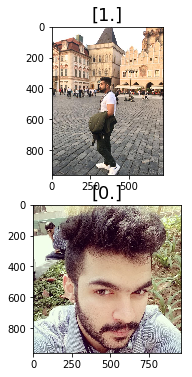

In [136]:
plots([image.load_img('data1/' + filenames[i]) for i in range(2)], figsize=(12,6), rows=2, titles=probs)